# `INDEED JOB POSTING TEXT: NLP & WORD CLOUD ` 

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome:

+ Gain more experience with NLP and have fun with a new visualization technique

+ Clean the text using NLTK

+ Create a word cloud and have the words inlaid within an image I provide

In [285]:
import pickle                            # open our file
import pandas as pd
import os

# plotting image with word cloud
import PIL                               # for our images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting

# nlp
import nltk                              # text processing
from nltk import word_tokenize           # split sentence into list of words
from nltk.corpus import stopwords        # remove: and,it,i,etc
import string                            # remove punctuation
from collections import defaultdict      # dictionary with values as lists
from nltk.stem import WordNetLemmatizer  # remove word endings etc

In [72]:

filename='Indeed_scrape_Oct2020.txt'
file_ =open(filename,'rb')
indeed_jobs =pickle.load(file_)
indeed_jobs.head()

,job_title,company_name,location,summary,post_Date,Qualification_link,Qual_Text,posting_date_fixed,skill_matches
0,"Data Scientist, Medical Diagnostics",Specific Diagnostics,"Mountain View, CA 94043",The development of data-driven visualization t...,30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ASXGwdLWjBNYivRa...,The CompanyThe world is facing a medical crisi...,09-10-2020,"[python, sql, visualization]"
1,Data Scientist,Laxmi Therapeutic Devices,"Goleta, CA 93117",7+ years' practical experience manipulating da...,16 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ALgD31io3l0I0Y-r...,Data ScientistLaxmi Therapeutic Devices – Gole...,09-24-2020,"[python, sql, statistics, algorithms]"
2,Data Scientist,Blue Owl,"San Francisco, CA","We’re using rich customer insights, advanced t...",30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0D3UvD5kBSgX9r9tF...,"Our Mission\nWe’re here to create a safer, hap...",09-10-2020,"[python, machine learning, deep learning, pandas]"
3,Data Engineer,"Amick Brown, LLC","Sunnyvale, CA",Develops technical tools and programming that ...,Today,/pagead/clk?mo=r&ad=-6NYlbfkN0A74pTrSPrBtiJlYH...,"Data EngineerSunnyvale, CAAmick Brown is seeki...",10-10-2020,"[python, sql, aws, machine learning]"
4,Data Scientist,Triplebyte,California,You'll report directly to Triplebytes' Head of...,22 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9C...,About Triplebyte\n\nTriplebyte is transforming...,09-18-2020,"[aws, machine learning]"


# `Get a baseline of how many words there are for each entry:`

In [73]:
orig_word_cnts=[]
for i in indeed_jobs['Qual_Text']:
    orig_word_cnts.append(len(i))

indeed_text_cnts=pd.concat([indeed_jobs['Qual_Text'],
pd.DataFrame(orig_word_cnts,columns=['Qual_Text_wrdCnt'])],axis=1)

indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt
0,The CompanyThe world is facing a medical crisi...,3938
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798
2,"Our Mission\nWe’re here to create a safer, hap...",3423
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505
4,About Triplebyte\n\nTriplebyte is transforming...,2772


# `Remove punctuation and digits:`


In [74]:
# import string
wrd_lst_tokens=[]
for ikl in new_file_['Qual_Text']:
    punct=word_tokenize(''.join(j for j in ikl.lower() if j not in string.punctuation if not j.isdigit()))
    wrd_lst_tokens.append([punct])

pd.DataFrame(wrd_lst_tokens).head()

,0
0,"[the, companythe, world, is, facing, a, medica..."
1,"[data, scientistlaxmi, therapeutic, devices, –..."
2,"[our, mission, we, ’, re, here, to, create, a,..."
3,"[data, engineersunnyvale, caamick, brown, is, ..."
4,"[about, triplebyte, triplebyte, is, transformi..."


# `Remove Stopwords, single characters, useless words as well`

In [85]:
d=[]
stopwrds = stopwords.words('english')
for i in wrd_lst_tokens:
# removing single letters, [:-2] will remove last 2 str from each list bc useless
    line = [j for j in i[0] if len(j) > 1]
#     print(line)
# remove our stopwords like: ('i','it','etc')
    d.append([[ii for ii in line if ii not in stopwrds]])


# print('Example of amount of data after: ',len(pd.DataFrame(d)[0][1])/len(news_['content'][0]))
pd.DataFrame(d).head()


,0
0,"[companythe, world, facing, medical, crisis, b..."
1,"[data, scientistlaxmi, therapeutic, devices, g..."
2,"[mission, create, safer, happier, mindful, fut..."
3,"[data, engineersunnyvale, caamick, brown, seek..."
4,"[triplebyte, triplebyte, transforming, way, so..."


# Check back to see how many of our words are left as comparison

In [76]:
second_wrd_cnt=[]
for i in d:
    for j in i:
        second_wrd_cnt.append(len(j))

indeed_text_cnts['cleaned_wrd_cnt']=second_wrd_cnt
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,cleaned_wrd_cnt
0,The CompanyThe world is facing a medical crisi...,3938,317
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,241
2,"Our Mission\nWe’re here to create a safer, hap...",3423,330
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,224
4,About Triplebyte\n\nTriplebyte is transforming...,2772,252


# `Lemmatization: looking for root or bases of words`


In [77]:
# from collections import defaultdict
# from nltk.stem import WordNetLemmatizer  # remove word endings etc

lemmatizer = WordNetLemmatizer()
h=[]
for i in range(len(d)):
    for j in d[i][0]: # going inside each list and doing each word
#         print(j)
        h.append([i,lemmatizer.lemmatize(j)]) # i keeps the position 

dg=defaultdict(list)

for i in h:
    dg[i[0]].append(i[1]) # key=position,value:list of lists of strings

In [78]:
third=[]
for i in dg.values():
    third.append(len(i))


In [79]:
indeed_text_cnts['lemma_len']=third
indeed_text_cnts['lemma_wrds']=dg.values()
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,cleaned_wrd_cnt,lemma_len,lemma_wrds
0,The CompanyThe world is facing a medical crisi...,3938,317,317,"[companythe, world, facing, medical, crisis, b..."
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,241,241,"[data, scientistlaxmi, therapeutic, device, go..."
2,"Our Mission\nWe’re here to create a safer, hap...",3423,330,330,"[mission, create, safer, happier, mindful, fut..."
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,224,224,"[data, engineersunnyvale, caamick, brown, seek..."
4,About Triplebyte\n\nTriplebyte is transforming...,2772,252,252,"[triplebyte, triplebyte, transforming, way, so..."


# `Create Cloud Object:`

In [250]:
from PIL import Image
combine_all_wrd=[]
for i in indeed_text_cnts['lemma_wrds']:
#     print(i)
    b=" ".join(review for review in i)
    for j in i:
        combine_all_wrd.append(','.join(j))
len(combine_all_wrd)
vv=[]
# " ".join(review for review in indeed_text_cnts.lemma_wrds)
b

['companythe', 'world', 'facing', 'medical', 'crisis', 'bacteria', 'increasingly', 'evolving', 'resistance', 'even', 'strongest', 'antibiotic', 'problem', 'already', 'real', 'immediate', 'example', 'bloodstream', 'infection', 'leading', 'sepsis', 'responsible', 'half', 'death', 'hospital', 'expensive', 'condition', 'treated', 'hospital', 'sepsis', 'mortality', 'rate', 'increase', 'every', 'hour', 'without', 'effective', 'antibiotic', 'treatment', 'yet', 'despite', 'life', 'death', 'urgency', 'healthcare', 'cost', 'impact', 'current', 'methodology', 'require', 'day', 'determine', 'correct', 'antibioticspecific', 'diagnostics', 'developed', 'breakthrough', 'solution', 'rapidly', 'determine', 'effective', 'antibiotic', 'treatment', 'bloodstream', 'acute', 'infection', 'used', 'bloodstream', 'infection', 'specific', 'solution', 'provides', 'result', 'day', 'sooner', 'existing', 'method', 'saving', 'patient', 'suffering', 'drugresistant', 'infectionwe', 'funded', 'nearly', 'nondilutive', 'g

'ames numeric solution llc premier user experience web development service company located ames iowa year experience web database development team member worked successfully startup largescale enterprise produce worldclass interactive web application frontend backend current project include project punch card project eyeglass project briefcase project texamposition type full time experienced full time entry leveljob description data scientist evaluate improve product collaborate multidisciplinary team engineer analyst wide range problem position bring scientific rigor statistical method challenge product creation development improvement appreciation behavior end userjob responsibilitiesformulates lead guided multifaceted analytic study large volume datainterprets analyzes data using exploratory mathematic statistical technique based scientific methodcoordinates research analytic activity utilizing various data point unstructured structured employ programming clean massage organize data

# `Remove further words:`

+ First, get word frequencies to see if there are useless words to remove

+ Second, use a list of new stopwords to remove

In [277]:
f={}
for i in indeed_text_cnts['lemma_wrds']:
    for j in i:
#     print(i)
        if j in f:
            f[j]+=1
        else:
            f[j]=1
wrd_freq={k: v for k, v in sorted(f.items(), key=lambda item: item[1])}


In [283]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(wrd_freq.keys(),wrd_freq.values())
# plt.show()
wrd_freq['']

57

In [284]:
more_wrd_to_remove=['year','experience','user','employee','type','llc','member','youll',
'various','range','position','end','service','leveljob','wide','card']

# `Convert Image using Numpy:`

In [297]:
# mask: 
# img_mask= np.array(Image.open(os.path.join(os.getcwd(),'cartoon_computer.png')))
# img_mask=np.array(Image.open('cartoon_computer.png'))
# img_mask=np.array(Image.open('cloud_img.png'))
img_mask=np.array(Image.open('Slide1.png'))

In [316]:
wc=WordCloud(background_color='black',max_words=400,max_font_size=80,random_state=1,
    mask=img_mask,contour_color='red',min_font_size=8,normalize_plurals=True)
# for i in combine_all_wrd:
# wc.generate(combine_all_wrd)
# q

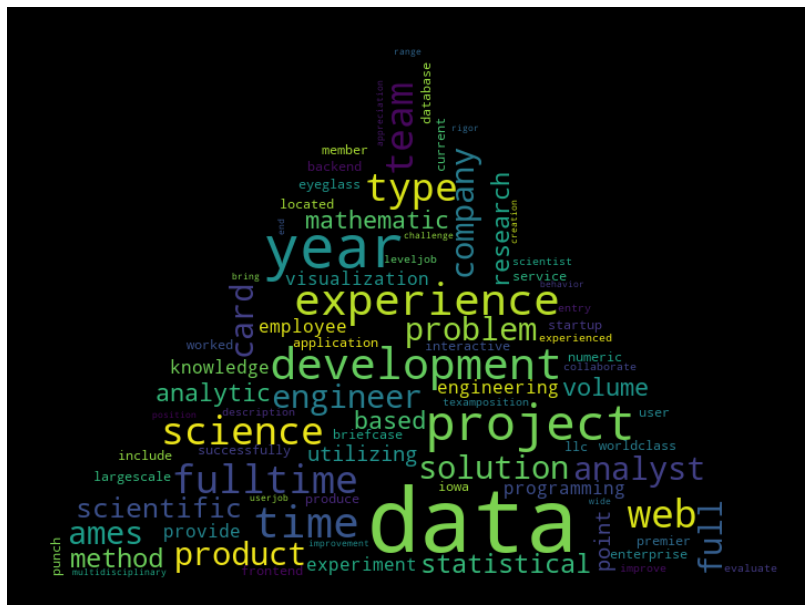

In [317]:
# for i in combine_all_wrd:
#     print(type(i))
# import matplotlib.pyplot as plt
wc.generate(b)

# q
# combine_all_wrd
# colors=wc.recolor(color_func=ImageColorGenerator(img_mask))
plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

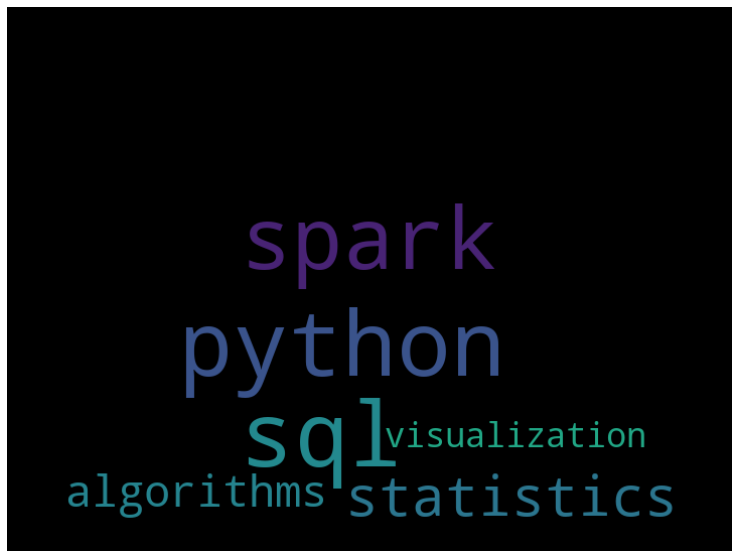

In [302]:
skills=[]
for i in indeed_jobs['skill_matches']:
     b_=" ".join(review for review in i)
wc=WordCloud(background_color='black',max_words=15,max_font_size=90,random_state=1,
    mask=img_mask)
wc.generate(b_)
plt.figure(figsize=(22,10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [255]:
# indeed_text_cnts['lemma_wrds']


0      [companythe, world, facing, medical, crisis, b...
1      [data, scientistlaxmi, therapeutic, device, go...
2      [mission, create, safer, happier, mindful, fut...
3      [data, engineersunnyvale, caamick, brown, seek...
4      [triplebyte, triplebyte, transforming, way, so...
                             ...                        
220    [greeting, applicanthere, parsec, education, o...
221    [bachelor, degreealexa, amazon, groundbreaking...
222    [bigger, challenge, bolder, idea, global, impa...
223    [looking, data, scientist, analyze, large, amo...
224    [ames, numeric, solution, llc, premier, user, ...
Name: lemma_wrds, Length: 225, dtype: object

# Citations & Help:

# ◔̯◔

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.youtube.com/watch?v=k-gin1qfzi0

https://www.youtube.com/watch?v=eHxWshJpoRk&t=1048s

